In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df=pd.read_csv('C:/Users/Dell/Documents/titanic.csv')
from sklearn.model_selection import train_test_split

In [5]:
print(df.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [6]:
df['male']=df['Sex']=='male'


In [7]:
X=df[['Pclass','male','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']].values
y=df['Survived'].values

In [8]:
print(X,y)

[[3 True 22.0 1 0 7.25]
 [1 False 38.0 1 0 71.2833]
 [3 False 26.0 0 0 7.925]
 ...
 [3 False 7.0 1 2 23.45]
 [1 True 26.0 0 0 30.0]
 [3 True 32.0 0 0 7.75]] [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 1

In [9]:
model=LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)

print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))

accuracy: 0.8049605411499436
precision: 0.7734627831715211
recall: 0.6988304093567251
f1 score: 0.7342549923195083


In [10]:
#train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y) #you can even use randon_state=any_value to deal with fixed values

print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

whole dataset: (887, 6) (887,)
training set: (665, 6) (665,)
test set: (222, 6) (222,)


In [11]:
# building the model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model
# print("accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.8063063063063063
precision: 0.8307692307692308
recall: 0.627906976744186
f1 score: 0.7152317880794703


In [12]:
from sklearn.metrics import recall_score
sensitivity_score = recall_score
print(sensitivity_score(y_test, y_pred)) 

0.627906976744186


In [14]:
from sklearn.metrics import precision_recall_fscore_support
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]
print("specificity:", specificity_score(y_test, y_pred))

specificity: 0.9191176470588235


In [16]:
#try changing threshold
'''A threshold of 0.75 means we need to be more confident in order to make a positive prediction. This results in fewer positive predictions and more negative predictions.'''
y_pred = model.predict_proba(X_test)[:, 1] > 0.75
#to choose a diff value except 0.5 we used predict prob function.Setting the threshold to 0.5 we would get the original 
# Logistic Regression model. Any other threshold value yields an alternative model.

print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

precision: 0.972972972972973
recall: 0.4186046511627907


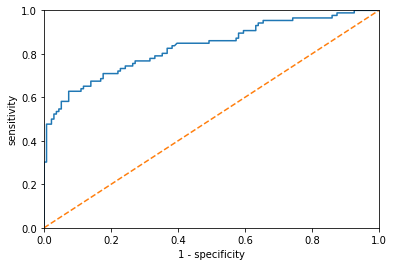

In [24]:
#ROC curve of the data
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt 
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [25]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.8337465800273598
model 1 AUC score: 0.8107472640218878


In [26]:
#now we implement k-fold validation in our data in order to determine precision
from sklearn.model_selection import KFold
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]
kf = KFold(n_splits=3, shuffle=True)
'''We start by instantiating a KFold class object. It takes two parameters: n_splits (this is k, the number of chunks to create) and shuffle (whether or not to randomize the order of the data). It’s generally good practice to shuffle the data since you often get a dataset that’s in a sorted order.'''
#Let’s look at the output of the split method. The split method returns a generator, so we use the list function to turn it into a list.
list(kf.split(X))

[(array([0, 2, 3, 4]), array([1, 5])),
 (array([1, 2, 3, 5]), array([0, 4])),
 (array([0, 1, 4, 5]), array([2, 3]))]

In [29]:
splits = list(kf.split(X))
first_split = splits[0]
print(first_split) #get first split
#The first array is the indices for the training set and the second is the indices for the test set. Let’s create these variables.
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)
#now create train and test based on these indices
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
#now print the result
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

(array([0, 2, 4, 5]), array([1, 3]))
training set indices: [0 2 4 5]
test set indices: [1 3]
X_train
[[22.      7.25  ]
 [26.      7.925 ]
 [35.      8.05  ]
 [27.      8.4583]]
y_train [0 1 0 0]
X_test
[[38.     71.2833]
 [35.     53.1   ]]
y_test [1 1]


In [30]:
#if we wish to loop over all the folds at a time:
scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)

[0.5, 0.0, 1.0, 0.0, 1.0]


In [33]:
#now compare different models in our datasets using k fold
import numpy as np

kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

Logistic Regression with all features
accuracy: 0.797060877293214
precision: 0.7584737484737485
recall: 0.6960210266532105
f1 score: 0.7243733550475713

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7970481812988002
precision: 0.7548313790554423
recall: 0.7100676837555933
f1 score: 0.7278309535552732

Logistic Regression with Fare & Age features
accuracy: 0.657290674792103
precision: 0.6538484848484848
recall: 0.2430123789050381
f1 score: 0.35297515426581905


In [34]:
#build a final model with x1
model = LogisticRegression()
model.fit(X1, y)

print(model.predict([[3, False, 25, 0, 1, 2]]))

[1]
